<a href="https://colab.research.google.com/github/Hiteshjr24/week_2_assignment/blob/main/transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import tensorflow as tf
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import random
import cv2
import tqdm as tqdm
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [6]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hiteshjr24","key":"5a117062a1ea5527a0d86256a1f7b7d9"}'}

In [7]:
! mkdir ~/.kaggle

In [8]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d vijaygiitk/multiclass-weather-dataset

 97% 130M/134M [00:01<00:00, 60.0MB/s]
100% 134M/134M [00:01<00:00, 82.1MB/s]


In [9]:
 ! unzip multiclass-weather-dataset.zip -d dataset

Archive:  multiclass-weather-dataset.zip
  inflating: dataset/dataset/alien_test/Cloud_1.png  
  inflating: dataset/dataset/alien_test/Cloud_2.jpg  
  inflating: dataset/dataset/alien_test/Cloud_3.jpeg  
  inflating: dataset/dataset/alien_test/Cloud_4.jpg  
  inflating: dataset/dataset/alien_test/foggy_1.jpg  
  inflating: dataset/dataset/alien_test/foggy_10.jpg  
  inflating: dataset/dataset/alien_test/foggy_2.jpg  
  inflating: dataset/dataset/alien_test/foggy_3.jpg  
  inflating: dataset/dataset/alien_test/foggy_4.jpg  
  inflating: dataset/dataset/alien_test/foggy_5.jpg  
  inflating: dataset/dataset/alien_test/foggy_6.jpg  
  inflating: dataset/dataset/alien_test/foggy_7.jpg  
  inflating: dataset/dataset/alien_test/foggy_8.jpg  
  inflating: dataset/dataset/alien_test/foggy_9.jpg  
  inflating: dataset/dataset/alien_test/rain_1.jpg  
  inflating: dataset/dataset/alien_test/rain_2.png  
  inflating: dataset/dataset/alien_test/rain_3.jpg  
  inflating: dataset/dataset/alien_test/ra

In [13]:
foggy = "/content/dataset/dataset/foggy"
sunrise = "/content/dataset/dataset/sunrise"
shine = "/content/dataset/dataset/shine"
rainy = "/content/dataset/dataset/rainy"
cloudy = "/content/dataset/dataset/cloudy"
test = "/content/dataset/dataset/alien_test"

In [14]:
import os
x = []
y = [] 
dataset =[]
def create_dataset(directory,dir_name):
    for i in tqdm.tqdm(os.listdir(directory)):
        full_path = os.path.join(directory,i)
        try:
            img = cv2.imread(full_path)
            img = cv2.resize(img,(150,150))
        except:
            continue
        x.append(img)
        y.append(dir_name)
    return x,y

In [16]:
x,y= create_dataset(foggy,"foggy")
x,y= create_dataset(sunrise,"sunrise")
x,y= create_dataset(shine,"shine")
x,y= create_dataset(rainy,"rainy")
x,y= create_dataset(cloudy,"cloudy")

100%|██████████| 300/300 [00:00<00:00, 408.96it/s]


In [17]:
x =  np.array(x)
y = np.array(y)

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
img_size =150

x_train = np.array(x_train)/255.0
x_test = np.array(x_test)/255.0


x_train = x_train.reshape(-1,img_size,img_size,3)
y_train = np.array(y_train)

x_test = x_test.reshape(-1,img_size,img_size,3)
y_test = np.array(y_test)

In [20]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_train_lb = lb.fit_transform(y_train)
y_test_lb = lb.fit_transform(y_test)

In [21]:
from tensorflow.keras.applications.vgg19 import VGG19
vgg = VGG19(weights = "imagenet",include_top=False,input_shape=(img_size,img_size,3))

80142336/80134624 [==============================] - 0s 0us/step


In [23]:
for layer in vgg.layers:
    layer.trainable = False

In [24]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
model =Sequential()
model.add(vgg)
model.add(Flatten())
model.add(Dense(5,activation="softmax"))


In [25]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics="accuracy")

In [26]:

history =  model.fit(x_train,y_train_lb,epochs=20,validation_data=(x_test,y_test_lb),
                     batch_size=32 ,verbose=1)


Epoch 1/20
38/38 [==============================] - 44s 214ms/step - loss: 1.1835 - accuracy: 0.5049 - val_loss: 0.5531 - val_accuracy: 0.8400
Epoch 2/20
38/38 [==============================] - 4s 116ms/step - loss: 0.4785 - accuracy: 0.8469 - val_loss: 0.4160 - val_accuracy: 0.8800
Epoch 3/20
38/38 [==============================] - 4s 115ms/step - loss: 0.3336 - accuracy: 0.9167 - val_loss: 0.3611 - val_accuracy: 0.8900
Epoch 4/20
38/38 [==============================] - 4s 112ms/step - loss: 0.2449 - accuracy: 0.9439 - val_loss: 0.3363 - val_accuracy: 0.8933
Epoch 5/20
38/38 [==============================] - 4s 109ms/step - loss: 0.2070 - accuracy: 0.9563 - val_loss: 0.3335 - val_accuracy: 0.9000
Epoch 6/20
38/38 [==============================] - 4s 107ms/step - loss: 0.1985 - accuracy: 0.9537 - val_loss: 0.3138 - val_accuracy: 0.8967
Epoch 7/20
38/38 [==============================] - 4s 106ms/step - loss: 0.1720 - accuracy: 0.9617 - val_loss: 0.3242 - val_accuracy: 0.8700
Epoch

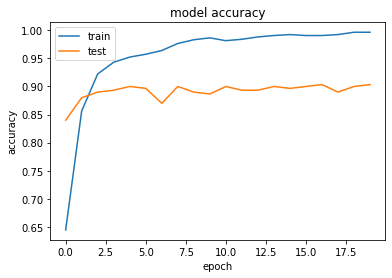

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

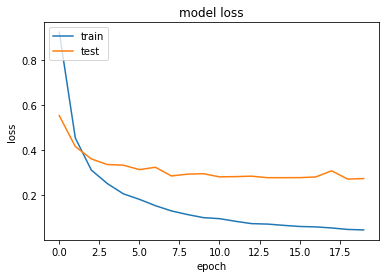

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()